<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_2_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,98.358900,64.467572,83.168411,52.843829,0.001366,308.840078,308.837232,0.002846
1,0.0,1.0,99.833494,71.385546,37.502017,61.285368,-0.001162,280.005264,280.004267,0.000997
2,0.0,2.0,24.962712,82.605313,87.194904,83.182083,-0.000209,287.944803,287.946216,-0.001413
3,0.0,3.0,78.193437,58.314384,79.538615,50.537638,-0.002941,276.581134,276.583259,-0.002126
4,0.0,4.0,97.385006,61.469927,79.179433,47.570882,0.000085,295.605334,295.603773,0.001560
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,86.818654,50.249527,56.229350,23.072752,0.004733,226.375015,226.369566,0.005449
119996,999.0,116.0,91.525722,81.132256,22.974089,56.793384,0.003092,262.428543,262.426156,0.002388
119997,999.0,117.0,77.446921,41.062315,49.327245,59.587516,-0.002589,237.421408,237.423607,-0.002200
119998,999.0,118.0,91.228418,56.524774,75.421868,87.766106,0.001745,320.942912,320.940796,0.002116


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    98.358900  64.467572  83.168411  52.843829  0.001366  308.840078   
      1.0    99.833494  71.385546  37.502017  61.285368 -0.001162  280.005264   
      2.0    24.962712  82.605313  87.194904  83.182083 -0.000209  287.944803   
      3.0    78.193437  58.314384  79.538615  50.537638 -0.002941  276.581134   
      4.0    97.385006  61.469927  79.179433  47.570882  0.000085  295.605334   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  86.818654  50.249527  56.229350  23.072752  0.004733  226.375015   
      116.0  91.525722  81.132256  22.974089  56.793384  0.003092  262.428543   
      117.0  77.446921  41.062315  49.327245  59.587516 -0.002589  237.421408   
      118.0  91.228418  56.524774  75.421868  87.766106  0.001745  320.942912   
      119.0  56.466959  71.759239  39.520161  82.729903  0.000886  260.477148   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    308.837232  0.002846  
      1.0    280.004267  0.000997  
      2.0    287.946216 -0.001413  
      3.0    276.583259 -0.002126  
      4.0    295.603773  0.001560  
...                 ...       ...  
999.0 115.0  226.369566  0.005449  
      116.0  262.426156  0.002388  
      117.0  237.423607 -0.002200  
      118.0  320.940796  0.002116  
      119.0  260.477060  0.000087  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    98.358900  64.467572  83.168411  52.843829  0.001366  308.840078   
      1.0    99.833494  71.385546  37.502017  61.285368 -0.001162  280.005264   
      2.0    24.962712  82.605313  87.194904  83.182083 -0.000209  287.944803   
      3.0    78.193437  58.314384  79.538615  50.537638 -0.002941  276.581134   
      4.0    97.385006  61.469927  79.179433  47.570882  0.000085  295.605334   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  86.818654  50.249527  56.229350  23.072752  0.004733  226.375015   
      116.0  91.525722  81.132256  22.974089  56.793384  0.003092  262.428543   
      117.0  77.446921  41.062315  49.327245  59.587516 -0.002589  237.421408   
      118.0  91.228418  56.524774  75.421868  87.766106  0.001745  320.942912   
      119.0  56.466959  71.759239  39.520161  82.729903  0.000886  260.477148   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    308.837232  0.002846  
      1.0    280.004267  0.000997  
      2.0    287.946216 -0.001413  
      3.0    276.583259 -0.002126  
      4.0    295.603773  0.001560  
...                 ...       ...  
999.0 115.0  226.369566  0.005449  
      116.0  262.426156  0.002388  
      117.0  237.423607 -0.002200  
      118.0  320.940796  0.002116  
      119.0  260.477060  0.000087  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,98.358900,64.467572,83.168411,52.843829,0.001366,308.840078,308.837232,0.002846
1,0.0,1.0,99.833494,71.385546,37.502017,61.285368,-0.001162,280.005264,280.004267,0.000997
2,0.0,2.0,24.962712,82.605313,87.194904,83.182083,-0.000209,287.944803,287.946216,-0.001413
3,0.0,3.0,78.193437,58.314384,79.538615,50.537638,-0.002941,276.581134,276.583259,-0.002126
4,0.0,4.0,97.385006,61.469927,79.179433,47.570882,0.000085,295.605334,295.603773,0.001560
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,86.818654,50.249527,56.229350,23.072752,0.004733,226.375015,226.369566,0.005449
119996,999.0,116.0,91.525722,81.132256,22.974089,56.793384,0.003092,262.428543,262.426156,0.002388
119997,999.0,117.0,77.446921,41.062315,49.327245,59.587516,-0.002589,237.421408,237.423607,-0.002200
119998,999.0,118.0,91.228418,56.524774,75.421868,87.766106,0.001745,320.942912,320.940796,0.002116


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    98.358900  64.467572  83.168411  52.843829  0.001366  308.840078   
      1.0    99.833494  71.385546  37.502017  61.285368 -0.001162  280.005264   
      2.0    24.962712  82.605313  87.194904  83.182083 -0.000209  287.944803   
      3.0    78.193437  58.314384  79.538615  50.537638 -0.002941  276.581134   
      4.0    97.385006  61.469927  79.179433  47.570882  0.000085  295.605334   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  86.818654  50.249527  56.229350  23.072752  0.004733  226.375015   
      116.0  91.525722  81.132256  22.974089  56.793384  0.003092  262.428543   
      117.0  77.446921  41.062315  49.327245  59.587516 -0.002589  237.421408   
      118.0  91.228418  56.524774  75.421868  87.766106  0.001745  320.942912   
      119.0  56.466959  71.759239  39.520161  82.729903  0.000886  260.477148   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    308.837232  0.002846  
      1.0    280.004267  0.000997  
      2.0    287.946216 -0.001413  
      3.0    276.583259 -0.002126  
      4.0    295.603773  0.001560  
...                 ...       ...  
999.0 115.0  226.369566  0.005449  
      116.0  262.426156  0.002388  
      117.0  237.423607 -0.002200  
      118.0  320.940796  0.002116  
      119.0  260.477060  0.000087  

[120000 rows x 8 columns]

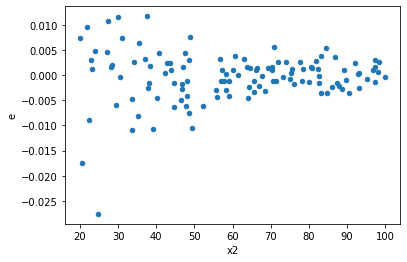

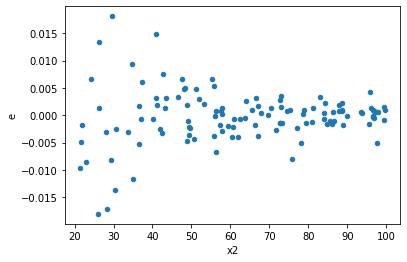

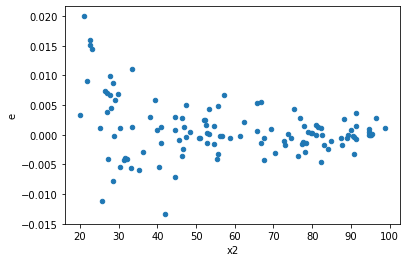

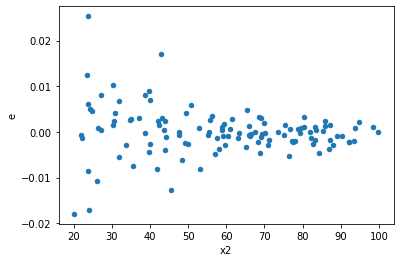

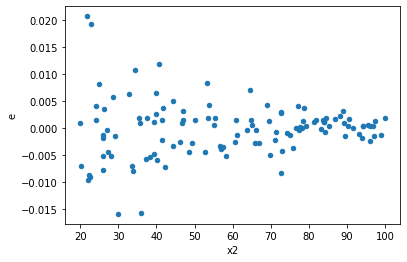

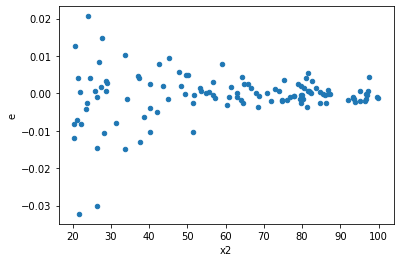

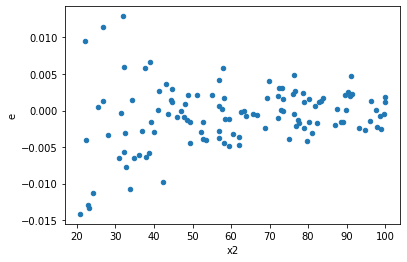

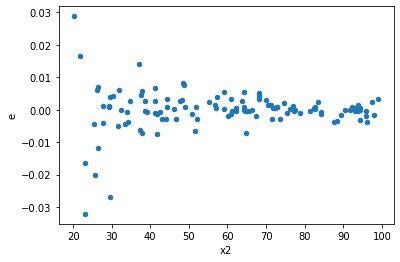

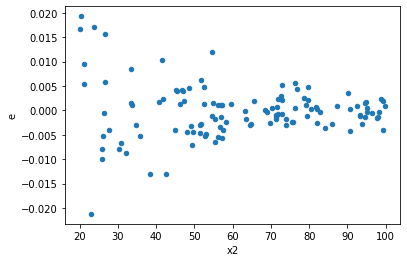

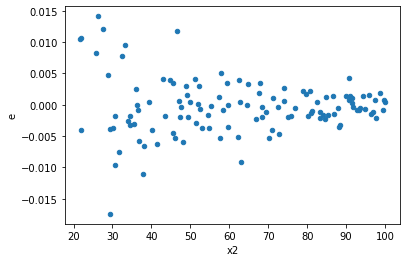

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,72.0,40.0,0.0010839576894999283,0.0012415450819318425,1.5054967909721226e-05,3.103862704829606e-05,2.0616866960077638,0.01437284421189755,0.9928135778940512,0.007186422105948775,Reject001=1 : Homoscedasticity
4.0,55.0,57.0,0.0003169260356277076,0.0026912780168589,5.76229155686741e-06,4.7215403804542105e-05,8.19385887343231,3.0664359940146824e-13,0.9999999999998467,1.5332179970073412e-13,Reject001=0 : Heteroscedasticity
5.0,59.0,53.0,0.00029222833157336946,0.0044770680275163345,4.95302256904016e-06,8.447298165125159e-05,17.054834795073727,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
7.0,54.0,58.0,0.0013416291663242744,0.0031606938028778692,2.4844984561560638e-05,5.4494720739273605e-05,2.1933891970931665,0.0036836067101917447,0.9981581966449041,0.0018418033550958723,Reject001=0 : Heteroscedasticity
8.0,51.0,61.0,0.0009822007282334917,0.0025115394022107384,1.9258837808499837e-05,4.117277708542194e-05,2.137864054665357,0.004724153576099788,0.9976379232119501,0.002362076788049894,Reject001=0 : Heteroscedasticity
11.0,50.0,62.0,0.0018992870460275224,0.003430098200210615,3.798574092055045e-05,5.532416451952605e-05,1.4564455813890795,0.15930522659292046,0.9203473867035398,0.07965261329646023,Reject001=1 : Homoscedasticity
19.0,57.0,55.0,0.0002589592494484238,0.003648309253185031,4.54314472716533e-06,6.633289551245511e-05,14.600656482683341,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
22.0,51.0,61.0,0.0007644314637211187,0.002187414522020378,1.4988852229825856e-05,3.585925445935046e-05,2.392394955231811,0.001213332759896213,0.9993933336200519,0.0006066663799481065,Reject001=0 : Heteroscedasticity
24.0,59.0,53.0,0.001807350257641937,0.0016988807641645622,3.0633055214270116e-05,3.2054354040840795e-05,1.0463975537741523,0.8698648908306745,0.5650675545846627,0.43493244541533727,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,72.0,40.0,0.0010839576894999283,0.0012415450819318425,1.5054967909721226e-05,3.103862704829606e-05,2.0616866960077638,0.01437284421189755,Reject001=1 : Homoscedasticity
1.0,46.0,66.0,0.0015085642303085368,0.0012277737693476584,3.279487457192471e-05,1.8602632868903915e-05,0.5672420801032549,0.04391748949060506,Reject001=1 : Homoscedasticity
2.0,53.0,59.0,0.0014523175875984452,0.0008484387549502157,2.7402218633932928e-05,1.4380317880512131e-05,0.5247866266822857,0.01827190991809699,Reject001=1 : Homoscedasticity
3.0,53.0,59.0,0.0017510133408083163,0.0014012191687903307,3.303798756242106e-05,2.3749477437124248e-05,0.7188536345397141,0.2237088748282865,Reject001=1 : Homoscedasticity
4.0,55.0,57.0,0.0003169260356277076,0.0026912780168589,5.76229155686741e-06,4.7215403804542105e-05,8.19385887343231,3.0664359940146824e-13,Reject001=0 : Heteroscedasticity
5.0,59.0,53.0,0.00029222833157336946,0.0044770680275163345,4.95302256904016e-06,8.447298165125159e-05,17.054834795073727,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,49.0,63.0,0.0014555969575317943,0.0005443421052973014,2.970606035779172e-05,8.640350877734943e-06,0.29086155396128227,1.5694913576649165e-05,Reject001=0 : Heteroscedasticity
7.0,54.0,58.0,0.0013416291663242744,0.0031606938028778692,2.4844984561560638e-05,5.4494720739273605e-05,2.1933891970931665,0.0036836067101917447,Reject001=0 : Heteroscedasticity
8.0,51.0,61.0,0.0009822007282334917,0.0025115394022107384,1.9258837808499837e-05,4.117277708542194e-05,2.137864054665357,0.004724153576099788,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    534
Reject001=1 : Homoscedasticity      466
Name: Result_test, dtype: int64